<center><h3>Régression linéaire multiple<h3></center>

In [1]:
#Importation des bibiotheques

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
PositionSalary = pd.read_csv("./../../Datasets/Position_Salaries.csv")

PositionSalary.head(5)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


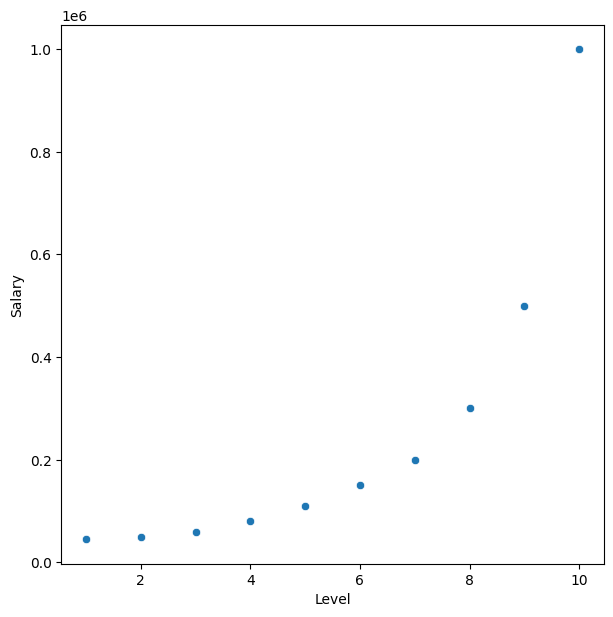

In [3]:

plt.figure(figsize=(7,7))
sns.scatterplot(x=PositionSalary["Level"] , y=PositionSalary["Salary"] )
plt.show()


In [4]:
print(PositionSalary["Position"].isna().sum())
print(PositionSalary["Level"].isna().sum())
print(PositionSalary["Salary"].isna().sum())

0
0
0


In [5]:
PositionSalary.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
#Faisons le label encoder sur le données categorielles identifiés par la colonne Position
"""
On a pas besoin d'encoder la colonne Position car on peut faire une correspondance avec la colonne 
Level , ainsi on va considerer uniquement les colonnes Levels et Salary comme jeu de données réels
"""
PositionSalary

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X_dataset = PositionSalary.iloc[:, 1:2].values
Y_dataset  = PositionSalary.iloc[:, 2].values
Y_dataset

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

<center>Prétraitement des données</center>

comme les données ne sont qu'au nombre entrainons le modele sur le dataset entier.

In [8]:
X_train = X_dataset
y_train = Y_dataset

In [9]:
y_train = y_train.reshape(-1, 1)#Quand on a un tableau 1D on doit faire un reshape pour le transformer en 2D car les entrées de la fonction fit doivent etre des tableaux 2D

<center>Normalisation des données</center>

In [10]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_train = sc_x.fit_transform(X_train)

y_train = sc_y.fit_transform(y_train)


<center>Implémentons le modele SVR</center>

In [11]:
from sklearn.tree import DecisionTreeRegressor


regressor_tree = DecisionTreeRegressor(random_state = 0)

regressor_tree.fit(X_train, y_train)



DecisionTreeRegressor(random_state=0)

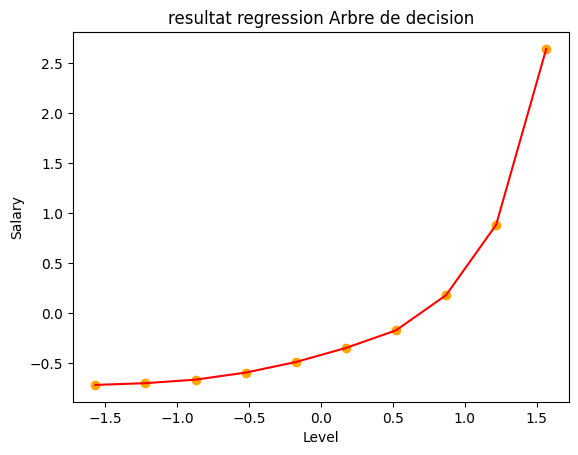

In [12]:
#Visualisation

plt.scatter(x=X_train, y=y_train, color="orange")
plt.plot(X_train, regressor_tree.predict(X_train), color="red")
plt.title("resultat regression Arbre de decision")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

/tmp/ipykernel_23654/2598263342.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train), max(X_train), 0.01)


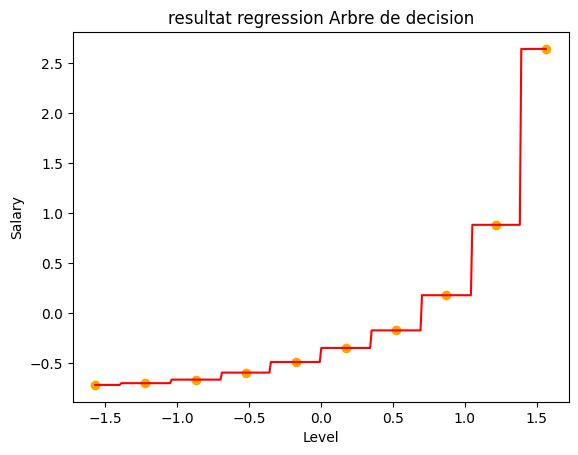

In [ ]:
#rendons la courbe de visualisation plus fine avec une forte resolution 
#cette courbe est reelement celle d'apprentissage

X_grid = np.arange(min(X_train), max(X_train), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(x=X_train, y=y_train, color="orange")
plt.plot(X_grid, regressor_tree.predict(X_grid), color="red")
plt.title("resultat regression Arbre de decision")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.show()

In [13]:
"""
Étant donné que les données predictes seront renvoyé sous forme normalisées pour recupperr 
leur vrai valeur on va utiliser la fonction  inverse_transform()
"""

y_pred = regressor_tree.predict(sc_x.transform([[6.5]]))

y_pred = sc_y.inverse_transform(y_pred.reshape(-1, 1))

print("Le salaire pour une position au level 6.5 est : ", y_pred)

Le salaire pour une position au level 6.5 est :  [[200000.]]
